#1. Pytorch workflow

In [184]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to the data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

In [185]:
import torch
from torch import nn #nn contains all the PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt
import numpy as np

#Check PyTorch version
torch.__version__

'2.0.1+cu118'

## 1. Data (preparing and loading)

Data can be almost anything.. in machine learning

* Excel spreadsheet
* Images of any kind
* Videos (youtube has lots of data..)
* Audio like songs or podcasts
* DNA
* Text

Machine Learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation.


To showcase this, let's create some *known* data using the linear regression formula

We'll use a linear regression formula to make a straight line with known parameters

In [186]:
# Create *known* parameters
weight = 0.7
bias = 0.3


# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [187]:
X.shape

torch.Size([50, 1])

In [188]:
#Splitting data into training and test daasets
#(one of the most important concepts in machine learning in general)

#Create a train/test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]



In [189]:
len(X_train) , len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [190]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

How might we better visualise the datA?

This is where data explorer's motto comes in!

`"Visualise, visualise, visualise"`

In [191]:
def plot_predictions(train_data = X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  """
  Plots training data, test data and compares predictions.
  """

  plt.figure(figsize=(10, 7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label='Training data')

  #Plot test data in green
  plt.scatter(test_data, test_labels , c="g", s=4, label="Testing data")

  #Are there predictions?
  if predictions is not None:
    #Plot the predictions if they exist
    plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")
  plt.legend()
  plt.title('Scatter plot of train and test variables')
  plt.xlabel('X')
  plt.ylabel("y")
  plt.show()

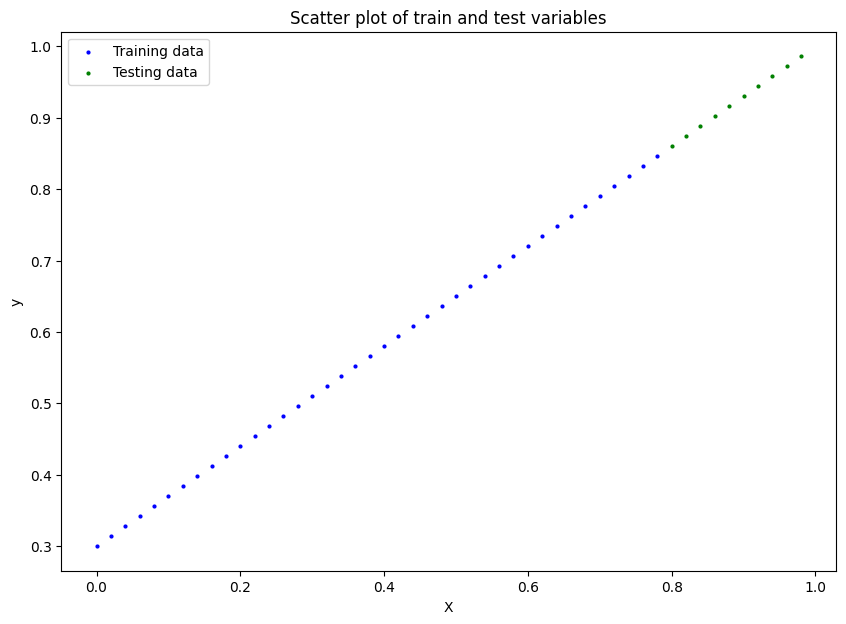

In [192]:
plot_predictions()

## 2. Build model

Our first PyTorch model


What our model does:
* Start with random values (weight & bias)
* Look at the training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms
1. Gradient descent
2. Backpropagation



In [193]:
 #Linear Regression model
#Create a Linear Regression model class

from torch import nn

class LinearRegressionModel(nn.Module): # <- ALmost everything in Pytorch inherits from nn.Moduie
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                            requires_grad=True, # <- can this parameter be updated visa gradient descent
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  #forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: #<- "x" is the input data
    return self.weight * x + self.bias # this is the linear regression formula


### Pytorch model building essentials

* torch.nn - contains all the buildings for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn? often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - base class for all neural network modules, if you subclass it, you should overwrite forward() function
* torch.optim - this is where optimisers in PyTorch live, they will help with gradient descent.


* def forward() - All nn.Module subclasses are required to overwrite forward(), this method defines what happens in the forward computation.


### Checking the contents of our PyTorch model

#Now we've created a model, lets see whats inside

So we can cehck our model parameters or what's inside our model using .parameters()

In [194]:
# Create a random seed

torch.manual_seed(42)

#Create an instance of the model (this is a subclass of the model

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [195]:
# List named Parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [196]:
weight, bias

(0.7, 0.3)

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, its going to run it through our forward method.

In [197]:
#Make prediction with model

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

##You can also do something similiar with torch.no_grad(), however, inference_mode() is preferred.
#with torch.no_grad():
#  y_preds = model_0(X_test)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

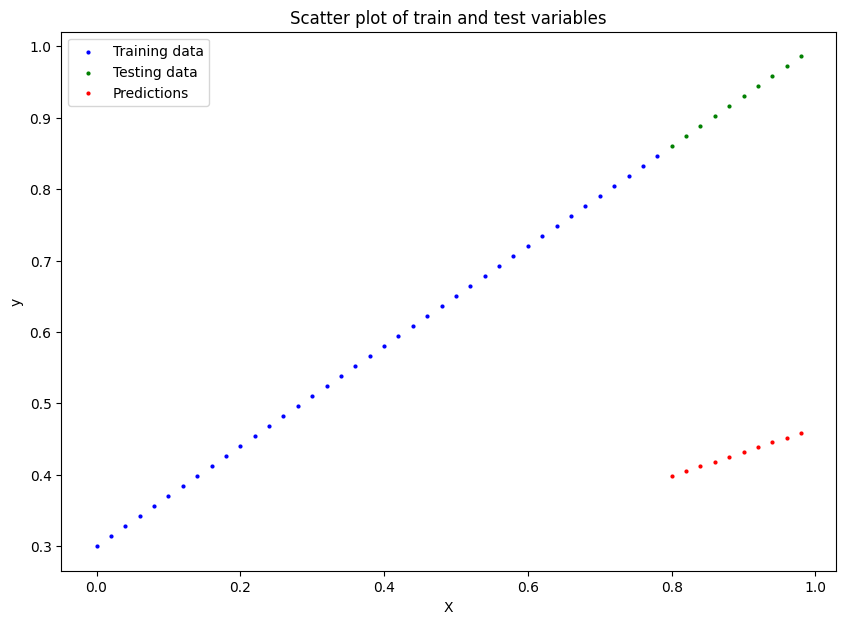

In [198]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training, is for a model to move from some unknown parameters. These may be random to some known parameters


Or from a poor representation of the data to a better representation of the data.


One way to measure how poor or how wrong your model's predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterio in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss Function:** A function to measure how wrong your model's predictions are to the ideal outputs. So, lower is better.

* **Optimiser:** Takes into account the loss of a model and adjust's the model's parameters. (eg. weight and loss in our case) to improve the loss function.

And specifically, for PyTorch, we need:
* A training loop
* A testing loop

In [199]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [200]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [201]:
#Setup a loss function
loss_fn = nn.L1Loss()

#Setup an optimiser (stochastic gradient descent)
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr= 0.01) #lr = Learning Rate = possibly the most important hyperparameter you can set


Q: Which loss function and optimizer should I use?

A: This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

For example, for a regression problem (like ours), a loss function of nn.L1Loss() and an optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss).


In [202]:
loss_fn

L1Loss()

In [203]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

### Building a training loop (and a testing loop) in PyTorch


A couple of things we need in a training loop.

0. Loop through the data
1. Forward pass - This involves data moving through our model's `forward()` function. - also called forward propagation.
2. Calculate the loss (compare forward pass predictions to ground truth labels).
3. Optimize zero grad
4. Loss backward - Move backwards through the network to calculate the gradients of each of the parameters of our model w.r.t. the loss.
5. Optimizer step - Use the optimizer to adjust our model's parameters to try and improve the loss. (**gradient descent**).



In [204]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [205]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [206]:
with torch.no_grad():
  print(list(model_0.parameters()))

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [207]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [208]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [209]:
# An epoch is one loop through the data... (this is a hyperparameter because we set it ourselves.)
epochs = 201

#Track diff values
epoch_count = []
loss_values = []
test_loss_values = []

#This is training mode
#Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch set

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation on the loss w.r.t. the parameters of the model
  loss.backward()

  #5. Step the optimizer (perform gradient descent)
  optimizer.step() #by default, how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3.

  #model_0.eval() #turns off gradient tracking
  model_0.eval() #This turns off diff settings in the model not needed for evaluation/testing
  with torch.inference_mode(): #This turns off gradient tracking & a couple more things behind the scenes
    #1. Do the forward pass
    test_pred = model_0(X_test)

    #2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    #Print out what's happening
    print(f"Epoch: {epoch} | Test: {loss} | Test loss: {test_loss}")

    #Print out the model state_dict()
    print(model_0.state_dict())



Epoch: 0 | Test: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Test: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weight', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Test: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weight', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Test: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weight', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Test: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weight', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Test: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weight', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Test: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weight', tensor([0.5116])), ('bias', tensor([0.3788]))])
E

In [210]:
epoch_count, loss_values, test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190,
  200],
 [tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>),
  tensor(0.0245, grad_fn=<MeanBackward0>),
  tensor(0.0210, grad_fn=<MeanBackward0>),
  tensor(0.0176, grad_fn=<MeanBackward0>),
  tensor(0.0142, grad_fn=<MeanBackward0>),
  tensor(0.0107, grad_fn=<MeanBackward0>),
  tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  t

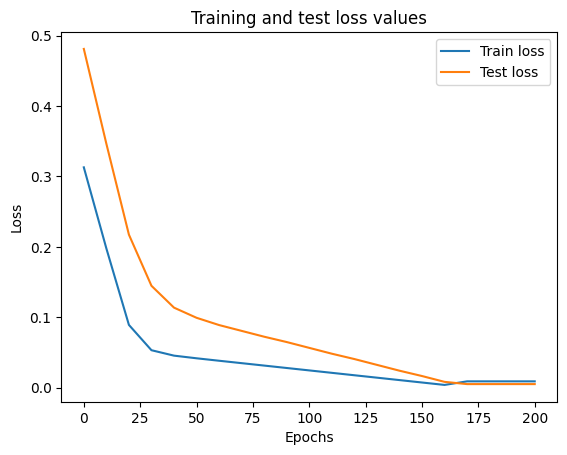

In [211]:
#Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()) , label='Train loss')
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label='Test loss')
plt.title("Training and test loss values")
plt.ylabel('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.show()

In [212]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [213]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6951])), ('bias', tensor([0.2993]))])

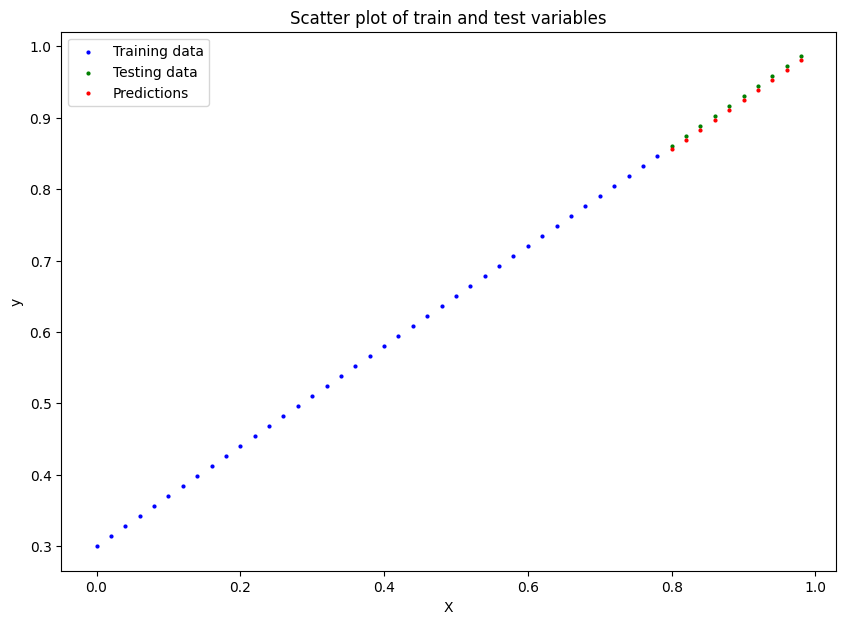

In [214]:
with torch.inference_mode():
  y_preds = model_0(X_test)
plot_predictions(predictions=y_preds)

# Saving a model in PyTorch

There are 3 main methods you should know about for saving and loading models in Python

1. `torch.save()` : this allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` : Allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` : This allows to load a model's saved state dictionary

In [215]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [216]:
#Saving our PyTorch model
from pathlib import Path


# 1. Create a models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH


# 3. Save the model
print(f"Saving the model to the path: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving the model to the path: models/01_pytorch_workflow_model_0.pth


#### To load in a saved state_dict() we have to instantiate a new instance of our model class


In [217]:
model_testload = LinearRegressionModel()

print(list(model_testload.parameters()))

model_testload.load_state_dict(torch.load(MODEL_SAVE_PATH))

print(list(model_testload.parameters()))

model_testload.eval()

[Parameter containing:
tensor([0.2345], requires_grad=True), Parameter containing:
tensor([0.2303], requires_grad=True)]
[Parameter containing:
tensor([0.6951], requires_grad=True), Parameter containing:
tensor([0.2993], requires_grad=True)]


LinearRegressionModel()

In [218]:
#Making some predictions with the loaded model
with torch.inference_mode():
  loaded_model_preds = model_testload(X_test)

loaded_model_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [219]:
# Compare model_testload with model_0
model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Saving and loading the entire model

In [220]:
ENTIRE_MODEL_NAME = "01_pytorch_workflow_entire_model_0.pth"
ENTIRE_MODEL_SAVE_PATH = MODEL_PATH / ENTIRE_MODEL_NAME

torch.save(obj=model_0, f=ENTIRE_MODEL_SAVE_PATH)

In [221]:
entiremodel_testload = torch.load(ENTIRE_MODEL_SAVE_PATH)
entiremodel_testload.eval()
print(entiremodel_testload.state_dict())

OrderedDict([('weight', tensor([0.6951])), ('bias', tensor([0.2993]))])


# 6. Putting it all together

Let's go back through the the steps above and see it all in one place.

In [222]:
# import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

#Check PyTorch version

torch.__version__

'2.0.1+cu118'

In [223]:
#Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

Device: cuda


In [224]:
!nvidia-smi

Wed Oct 11 21:12:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    41W / 300W |   1020MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 6.1. Data

In [225]:
# Create some data using the linear regression formula of y = weight * X + bias

weight = 0.7
bias = 0.3

#Create range values
start = 0
end = 1
step = 0.02

#Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) #without unsqueeze, errors will po up
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [226]:
#Test train split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:] , y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

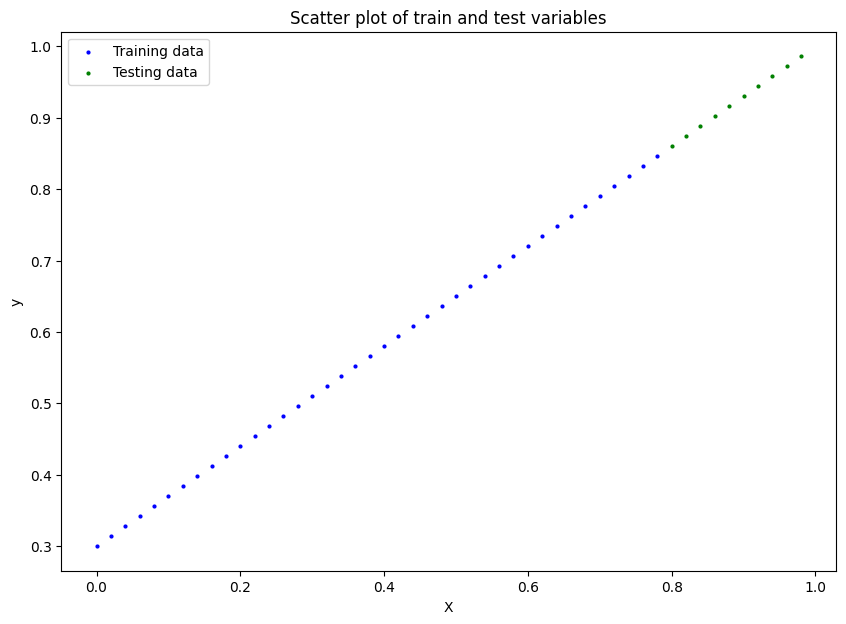

In [227]:
#Plot the data
#Note: if you don't have the plot_predictions()
plot_predictions(X_train, y_train, X_test, y_test)

In [228]:
## 6.2 Building a PyTorch linear model by subclassing nn.Module

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters / also called linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)


#set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [229]:
#Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [230]:
#Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 training

we need
* Loss function
* Optimizer
* Training loop
* Testing loop

In [231]:
loss_fn = nn.L1Loss() #same as MAE

#setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr = 0.01)

In [232]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 300

#Put data on the target device.
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  #1. Forward pass
  y_pred = model_1(X_train)

  #2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backprop
  loss.backward()

  #5. Optimizer step
  optimizer.step()

  ###Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  #Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416

In [233]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

## 6.4. Making and evaluating predictions

In [234]:
#Turn the model into evaluation mode
model_1.eval()

#Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

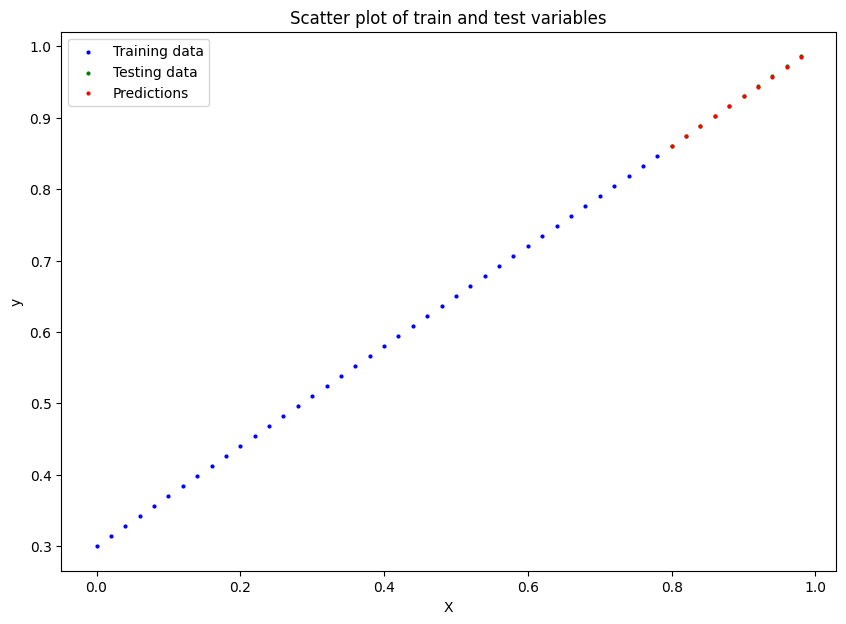

In [235]:
#Check out our model predictions visually
plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving and loading a trained model

In [238]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create a model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

#3. Save the model state dict
torch.save(obj= model_1.state_dict(), f=MODEL_SAVE_PATH)

In [239]:
MODEL_SAVE_PATH

PosixPath('models/01_pytorch_workflow_model_1.pth')

In [240]:
# Load a Pytorch model

#Create a new instance of the Linear regression Model V2

loaded_model_1 = LinearRegressionModelV2()

#Print state_dict
print(loaded_model_1.state_dict())


#Load the saved state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)

OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [241]:
print(loaded_model_1.state_dict())

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')), ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])


In [243]:
#Evaluate the loaded model
loaded_model_1.eval()
with torch.inference_mode():
  preds = loaded_model_1(X_test)

preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')